# Notebook created as a part of Capstone project

### 1. Importing the necessary libraries

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re
import numpy as np
from pandas.io.json import json_normalize
import ast
import seaborn as sns
import matplotlib.pyplot as plt
import folium

### 2. Extracting the rental prices for all neighourhoods

In [2]:
df = pd.DataFrame({'Locality Name': [], '1 BHk rent range': [], '1 BHk avg rent': [], '2 BHk rent range': [], 
                   '2 BHk avg rent': [], '3 BHk rent range': [], '3 BHk avg rent': []})

In [5]:
for i in range(1, 82):
    print(i)
    df2 = pd.read_html("https://www.makaan.com/price-trends/property-rates-for-rent-in-bangalore?page="+str(i))
    df2 = df2[0]
    df2.set_axis(['Locality Name', '1 BHk rent range', '1 BHk avg rent', '2 BHk rent range',
                 '2 BHk avg rent', '3 BHk rent range', '3 BHk avg rent'], axis=1, inplace=True)
    df = df.append(df2, ignore_index=True)

In [45]:
df = df_t.copy()

In [48]:
for i in range(df.shape[0]):
    if (df_t[i:i+1][['1 BHk rent range', '1 BHk avg rent', '2 BHk rent range', 
                   '2 BHk avg rent', '3 BHk rent range', '3 BHk avg rent']] == '-').all().all():
        df.drop(i, inplace=True)

In [49]:
df = df.reset_index().drop('index', axis=1)

In [51]:
df.to_csv('blr_localities.csv')

### 3. Extracting Latitude and Longitude for each neighbourhood using Google and BeautifulSoup

In [ ]:
df['Latitude'] = list(np.zeros(df.shape[0]))
df['Longitude'] = list(np.zeros(df.shape[0]))

for i in range(df.shape[0]):
    locality = df['Locality Name'][i]
    #print(i, locality)
    url = 'https://www.google.com/search?q=' + '+'.join(locality.split(' ') + ['Bangalore', 'India', 'coordinates'])
    source = requests.get(url).text
    soup = BeautifulSoup(source, 'lxml')
    a = soup.prettify()
    p = re.compile('[0-9][0-9]\.[0-9][0-9][0-9][0-9]. N')
    q = re.compile('[0-9][0-9]\.[0-9][0-9][0-9][0-9]. E')
    lat = p.search(a)
    long = q.search(a)
    if lat is None:
        url = 'https://www.google.com/search?q=' + '+'.join(locality.split(' ') + ['Bangalore', 'coordinates'])
        source = requests.get(url).text
        soup = BeautifulSoup(source, 'lxml')
        a = soup.prettify()
        p = re.compile('[0-9][0-9]\.[0-9][0-9][0-9][0-9]. N')
        q = re.compile('[0-9][0-9]\.[0-9][0-9][0-9][0-9]. E')
        lat = p.search(a)
        long = q.search(a)
    if lat is not None and long is not None:
        lat = lat.group(0)
        long = long.group(0)
        lat = float(lat[:-3])
        long = float(long[:-3])
        df['Latitude'][i] = lat
        df['Longitude'][i] = long

In [47]:
df.to_csv('localities_with_coords.csv')

In [229]:
df = pd.read_csv('localities_with_coords.csv')
df = df[['Locality Name', '1 BHk rent range', '1 BHk avg rent', '2 BHk rent range', 
         '2 BHk avg rent', '3 BHk rent range', '3 BHk avg rent', 'Latitude', 'Longitude']]

In [230]:
df.head()

,Locality Name,1 BHk rent range,1 BHk avg rent,2 BHk rent range,2 BHk avg rent,3 BHk rent range,3 BHk avg rent,Latitude,Longitude
0,Whitefield,"6,000 - 25,000",11192.86,"12,000 - 25,000",17375,"30,000 - 49,000",39500,12.9698,77.7500
1,Anekal City,6300,6300,10000,10000,-,-,12.7105,77.6911
2,Jigani,"5,800 - 10,500",7466.67,14000,14000,11000,11000,12.7791,77.6436
3,Yelahanka,"6,500 - 18,000",10500,"10,000 - 15,000",11500,18500,18500,13.1186,77.5975
4,Horamavu,"5,000 - 23,000",10415.63,"10,000 - 20,000",15535.71,"15,000 - 42,000",23700,13.0326,77.6583


In [231]:
df_t = df.copy()

In [232]:
for i in range(df_t.shape[0]):
    if (df_t[i:i+1]['Latitude'] == 0).all():
        df.drop(i, inplace=True)

In [233]:
df = df.reset_index().drop('index', axis=1)

In [234]:
df.head()

,Locality Name,1 BHk rent range,1 BHk avg rent,2 BHk rent range,2 BHk avg rent,3 BHk rent range,3 BHk avg rent,Latitude,Longitude
0,Whitefield,"6,000 - 25,000",11192.86,"12,000 - 25,000",17375,"30,000 - 49,000",39500,12.9698,77.7500
1,Anekal City,6300,6300,10000,10000,-,-,12.7105,77.6911
2,Jigani,"5,800 - 10,500",7466.67,14000,14000,11000,11000,12.7791,77.6436
3,Yelahanka,"6,500 - 18,000",10500,"10,000 - 15,000",11500,18500,18500,13.1186,77.5975
4,Horamavu,"5,000 - 23,000",10415.63,"10,000 - 20,000",15535.71,"15,000 - 42,000",23700,13.0326,77.6583


In [61]:
df.to_csv('localities_with_coords_filtered.csv')

### 4. Find the local venues for each neighburhood using FourSqaure API

In [179]:
CLIENT_ID = 'IXYG0AMMRTIFX4CTNFQCV35CY3PG5RW3MZNYYG14OMPDTM4T'
CLIENT_SECRET = 'VNSQQELLJYESXVU4ETENXNCEFGZVGMWCH4LZ3UO3103SCCUD'
VERSION = '20190605'

In [75]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [ ]:
categ_list = []

df = pd.read_csv('localities_with_coords_filtered.csv')
df['Venues'] = [[]] * df.shape[0]

for i in range(990, 996):
    
    latitude = df[i:i+1]['Latitude'][i]
    longitude = df[i:i+1]['Longitude'][i]
    LIMIT = 100
    radius = 800
    
    print(i)

    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        latitude, 
        longitude, 
        radius, 
        LIMIT)

    results = requests.get(url).json()

    venues = results['response']['groups'][0]['items']

    nearby_venues = json_normalize(venues) # flatten JSON
    
    if not nearby_venues.empty:
        
        # filter columns
        filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']

        nearby_venues =nearby_venues.loc[:, filtered_columns]

        # filter the category for each row
        nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

        # clean columns
        nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
        
        df.at[i, 'Venues'] = list(nearby_venues['categories'])

        categ_list = list(set(categ_list + list(nearby_venues['categories'])))
    
    else:
        
        df.at[i, 'Venues'] = []

In [197]:
df.to_csv('localities_with_venues.csv')

In [236]:
df = pd.read_csv('localities_with_venues.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Locality Name,1 BHk rent range,1 BHk avg rent,2 BHk rent range,2 BHk avg rent,3 BHk rent range,3 BHk avg rent,Latitude,Longitude,Venues
0,Whitefield,"6,000 - 25,000",11192.86,"12,000 - 25,000",17375,"30,000 - 49,000",39500,12.9698,77.7500,"['Eastern European Restaurant', 'Gym / Fitness..."
1,Anekal City,6300,6300,10000,10000,-,-,12.7105,77.6911,['ATM']
2,Jigani,"5,800 - 10,500",7466.67,14000,14000,11000,11000,12.7791,77.6436,"['Hotel', 'Indian Restaurant']"
3,Yelahanka,"6,500 - 18,000",10500,"10,000 - 15,000",11500,18500,18500,13.1186,77.5975,[]
4,Horamavu,"5,000 - 23,000",10415.63,"10,000 - 20,000",15535.71,"15,000 - 42,000",23700,13.0326,77.6583,"['Athletics & Sports', 'Warehouse Store', 'Chi..."


### 6. Computing number of each type of service available in each neighbourhood

In [212]:
food_services = ['Ice Cream Shop', 'Butcher', 'Salad Place', 'Dhaba', 'Gaming Cafe', 'Dessert Shop', 'Food Truck', 'Cupcake Shop',
                'Street Food Gathering', 'Coffee Shop', 'Steakhouse', 'Hot Dog Joint', 'Burger Joint', 'Juice Bar', 'Cafeteria',
                'Café', 'Bakery', 'Bed & Breakfast', 'Pizza Place', 'Soup Place', 'Brewery', 'Hookah Bar', 'Fish & Chips Shop',
                'Restaurant', 'Chaat Place', 'Food Service', 'Taco Place', 'Food Court', 'BBQ Joint', 'Breakfast Spot', 'Lounge',
                'Donut Shop', 'Buffet', 'Food', 'Cocktail Bar', 'Chocolate Shop', 'Wine Shop', 'Bubble Tea Shop', 'Wine Bar',
                'Food Stand', 'Food & Drink Shop', 'Indian Sweet Shop', 'Sandwich Place', 'Fried Chicken Joint', 
                'Fruit & Vegetable Store', 'Gourmet Shop', 'Tea Room', 'Liquor Store', 'Bagel Shop', 'Snack Place', 'Bar',
                'Burrito Place', 'Fish Market', 'Irish Pub', 'Hotel Bar', 'Sports Bar', 'Beer Garden', 'Dive Bar', 'Pub',
                'Beer Bar', 'Diner', 'Gastropub', 'Candy Store', 'Creperie']

shopping_centres = ['Jewelry Store', 'Sporting Goods Shop', 'Convenience Store', 'Optical Shop', 'Boutique', 'Shipping Store',
                    'Bridal Shop', 'Toy / Game Store', 'Miscellaneous Shop', 'Paper / Office Supplies Store', 'Flea Market',
                    'Mobile Phone Shop', 'Cosmetics Shop', 'Automotive Shop', 'Farmers Market', 'Electronics Store',
                    'Department Store', 'Big Box Store', 'Clothing Store', 'Duty-free Shop', "Women's Store", 'Camera Store',
                    'Accessories Store', "Men's Store", 'Shopping Plaza', 'IT Services', 'Gift Shop', 'Bike Shop',
                    'Shop & Service', 'Smoke Shop', 'Outlet Store', 'Flower Shop', 'Watch Shop', 'Market',
                    'Furniture / Home Store', 'Music Store', 'Motorcycle Shop', 'Grocery Store', 'Supermarket',
                    'Arts & Crafts Store', 'Pet Store', 'Outdoor Supply Store', 'Bookstore', 'Shopping Mall', 'Shoe Store',
                    'Kids Store']

leisure_spots = ['Athletics & Sports', 'Stadium', 'Field', 'Historic Site', 'Botanical Garden', 'Garden Center',
                 'Science Museum', 'Badminton Court', 'Deli / Bodega', 'Hockey Arena', 'Plaza', 'Wings Joint', 'Sports Club',
                 'Playground', 'Garden', 'Indie Movie Theater', 'Go Kart Track', 'Lake', 'Movie Theater', 'Neighborhood',
                 'Capitol Building', 'Arcade', 'Football Stadium', 'Rest Area', 'Art Museum', 'Pool', 'Resort', 'Moving Target',
                 'Multiplex', 'Dog Run', 'Planetarium', 'Paintball Field', 'Bowling Alley', 'Performing Arts Venue',
                 'Track Stadium', 'Tennis Stadium', 'Outdoors & Recreation', 'Bridge', 'Event Space', 'Park', 'Dance Studio',
                 'Pool Hall', 'Spiritual Center', 'Boxing Gym', 'Gym Pool', 'Scenic Lookout', 'Racetrack', 'Tennis Court',
                 'Concert Hall', 'Recreation Center', 'Gym', 'Basketball Court', 'Theater', 'Boat or Ferry', 'Hotel Pool',
                 'Toll Plaza', 'Mountain', 'Trail', 'Other Great Outdoors', 'Arts & Entertainment', 'Zoo', 'Nightclub',
                 'Building', 'Bistro', 'Spa', 'Soccer Stadium', 'Hotel', 'Roof Deck', 'Soccer Field', 'Racecourse',
                 'Monument / Landmark', 'Golf Course', 'Gym / Fitness Center', 'General Entertainment', 'Yoga Studio',
                 'Music Venue', 'Campground', 'Lighthouse', 'Art Gallery', 'Bike Trail', 'Road']

gen_services = ['Tech Startup', 'Event Service', 'Airport Service', 'Construction & Landscaping', 'Metro Station', 'Bus Station',
                'Motel', 'ATM', 'Salon / Barbershop', 'General College & University', 'Bus Line', 'Business Service',
                'Airport Terminal', 'Toll Booth', 'Auto Garage', 'Health & Beauty Service', 'Pharmacy', 'Bus Stop',
                'Design Studio', 'Home Service', 'Speakeasy', 'Hospital', 'Platform', 'Intersection', 'Health Food Store',
                'Light Rail Station', 'Tourist Information Center', 'Airport Lounge', 'Airport Gate',
                'Photography Studio', 'Warehouse Store', 'Office', 'Farm', 'Train Station', 'Shoe Repair', 'Coworking Space',
                'Laundromat', 'Airport', 'Gas Station', 'Taxi Stand', 'Boarding House', 'Tattoo Parlor', 'Print Shop',
                'Dry Cleaner']

In [214]:
df['Food Services'] = list(np.zeros(df.shape[0]))
df['Shopping Services'] = list(np.zeros(df.shape[0]))
df['Leisure Services'] = list(np.zeros(df.shape[0]))
df['General Services'] = list(np.zeros(df.shape[0]))

In [215]:
df.head()

,Locality Name,1 BHk rent range,1 BHk avg rent,2 BHk rent range,2 BHk avg rent,3 BHk rent range,3 BHk avg rent,Latitude,Longitude,Venues,Food Services,Shopping Services,Leisure Services,General Services
0,Whitefield,"6,000 - 25,000",11192.86,"12,000 - 25,000",17375,"30,000 - 49,000",39500,12.9698,77.7500,"['Eastern European Restaurant', 'Gym / Fitness...",0.0,0.0,0.0,0.0
1,Anekal City,6300,6300,10000,10000,-,-,12.7105,77.6911,['ATM'],0.0,0.0,0.0,0.0
2,Jigani,"5,800 - 10,500",7466.67,14000,14000,11000,11000,12.7791,77.6436,"['Hotel', 'Indian Restaurant']",0.0,0.0,0.0,0.0
3,Yelahanka,"6,500 - 18,000",10500,"10,000 - 15,000",11500,18500,18500,13.1186,77.5975,[],0.0,0.0,0.0,0.0
4,Horamavu,"5,000 - 23,000",10415.63,"10,000 - 20,000",15535.71,"15,000 - 42,000",23700,13.0326,77.6583,"['Athletics & Sports', 'Warehouse Store', 'Chi...",0.0,0.0,0.0,0.0


In [226]:
for i in range(df.shape[0]):
    
    venue_list = df[i:i+1]['Venues'][i]
    venue_list = ast.literal_eval(venue_list)
    df.at[i, 'Food Services'] = len([x for x in venue_list if 'Restaurant' in x or x in food_services])
    df.at[i, 'Shopping Services'] = len([x for x in venue_list if x in shopping_centres])
    df.at[i, 'Leisure Services'] = len([x for x in venue_list if x in leisure_spots])
    df.at[i, 'General Services'] = len([x for x in venue_list if x in gen_services])

In [228]:
df.to_csv('localities_with_service_data.csv')

In [2]:
df = pd.read_csv('localities_with_service_data.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Locality Name,1 BHk rent range,1 BHk avg rent,2 BHk rent range,2 BHk avg rent,3 BHk rent range,3 BHk avg rent,Latitude,Longitude,Venues,Food Services,Shopping Services,Leisure Services,General Services
0,Whitefield,"6,000 - 25,000",11192.86,"12,000 - 25,000",17375,"30,000 - 49,000",39500,12.9698,77.7500,"['Eastern European Restaurant', 'Gym / Fitness...",13.0,1.0,3.0,0.0
1,Anekal City,6300,6300,10000,10000,-,-,12.7105,77.6911,['ATM'],0.0,0.0,0.0,1.0
2,Jigani,"5,800 - 10,500",7466.67,14000,14000,11000,11000,12.7791,77.6436,"['Hotel', 'Indian Restaurant']",1.0,0.0,1.0,0.0
3,Yelahanka,"6,500 - 18,000",10500,"10,000 - 15,000",11500,18500,18500,13.1186,77.5975,[],0.0,0.0,0.0,0.0
4,Horamavu,"5,000 - 23,000",10415.63,"10,000 - 20,000",15535.71,"15,000 - 42,000",23700,13.0326,77.6583,"['Athletics & Sports', 'Warehouse Store', 'Chi...",2.0,0.0,1.0,1.0


In [3]:
df_t = df.copy()
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

In [4]:
for i in range(df_t.shape[0]):
    if (df_t[i:i+1]['1 BHk avg rent'] == '-').all():
        df1.drop(i, inplace=True)

for i in range(df_t.shape[0]):
    if (df_t[i:i+1]['2 BHk avg rent'] == '-').all():
        df2.drop(i, inplace=True)

for i in range(df_t.shape[0]):
    if (df_t[i:i+1]['3 BHk avg rent'] == '-').all():
        df3.drop(i, inplace=True)

In [5]:
df1 = df1[['Locality Name', '1 BHk rent range', '1 BHk avg rent', 'Latitude', 'Longitude', 'Venues',
           'Food Services', 'Shopping Services', 'Leisure Services', 'General Services']]

df2 = df2[['Locality Name', '2 BHk rent range', '2 BHk avg rent', 'Latitude', 'Longitude', 'Venues',
           'Food Services', 'Shopping Services', 'Leisure Services', 'General Services']]

df3 = df3[['Locality Name', '3 BHk rent range', '3 BHk avg rent', 'Latitude', 'Longitude', 'Venues',
           'Food Services', 'Shopping Services', 'Leisure Services', 'General Services']]

In [6]:
df1['1 BHk avg rent'] = df1['1 BHk avg rent'].astype(float) 
df2['2 BHk avg rent'] = df2['2 BHk avg rent'].astype(float) 
df3['3 BHk avg rent'] = df3['3 BHk avg rent'].astype(float) 

### 7. Statistical Inferencing

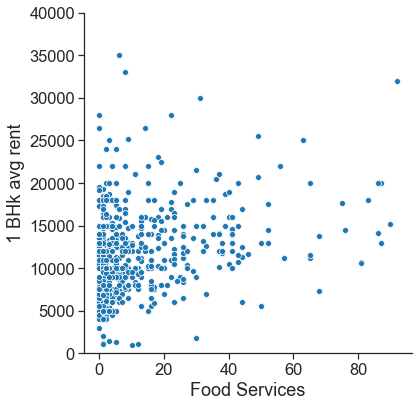

In [77]:
g = sns.pairplot(df1, x_vars=['Food Services'], y_vars=['1 BHk avg rent'], height=6)
g.set(ylim=(0, 40000))

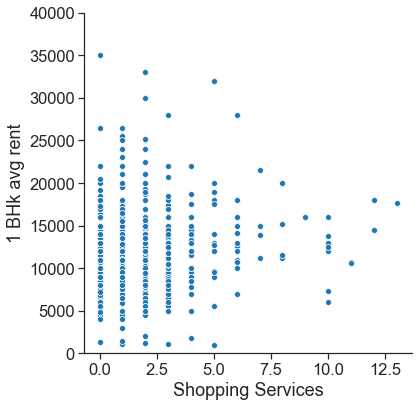

In [79]:
g = sns.pairplot(df1, x_vars=['Shopping Services'], y_vars=['1 BHk avg rent'], height=6)
g.set(ylim=(0, 40000))

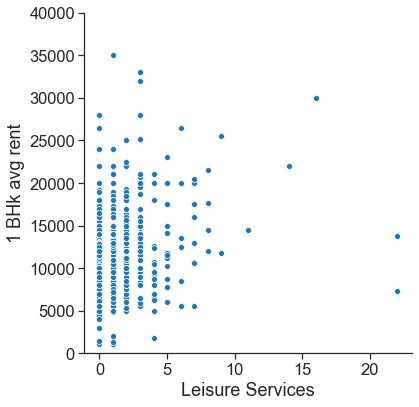

In [80]:
g = sns.pairplot(df1, x_vars=['Leisure Services'], y_vars=['1 BHk avg rent'], height=6)
g.set(ylim=(0, 40000))

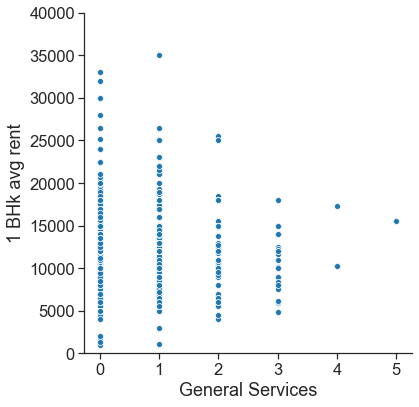

In [81]:
g = sns.pairplot(df1, x_vars=['General Services'], y_vars=['1 BHk avg rent'], height=6)
g.set(ylim=(0, 40000))

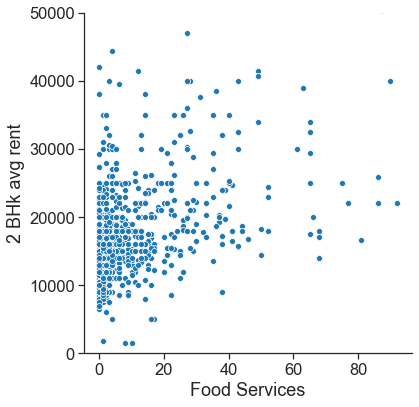

In [83]:
g = sns.pairplot(df2, x_vars=['Food Services'], y_vars=['2 BHk avg rent'], height=6)
g.set(ylim=(0, 50000))

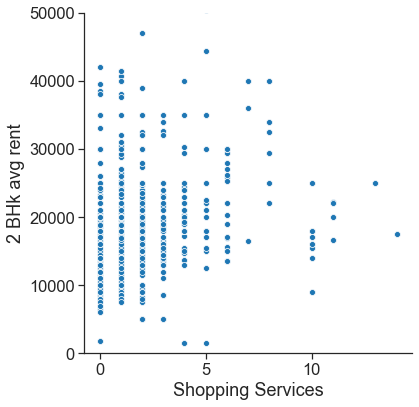

In [84]:
g = sns.pairplot(df2, x_vars=['Shopping Services'], y_vars=['2 BHk avg rent'], height=6)
g.set(ylim=(0, 50000))

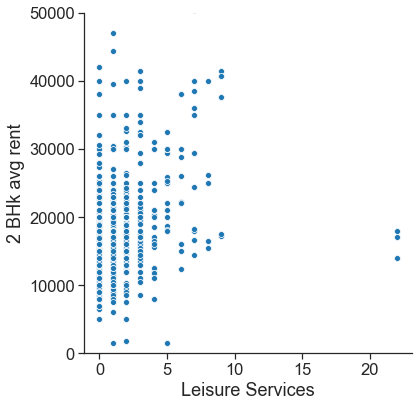

In [85]:
g = sns.pairplot(df2, x_vars=['Leisure Services'], y_vars=['2 BHk avg rent'], height=6)
g.set(ylim=(0, 50000))

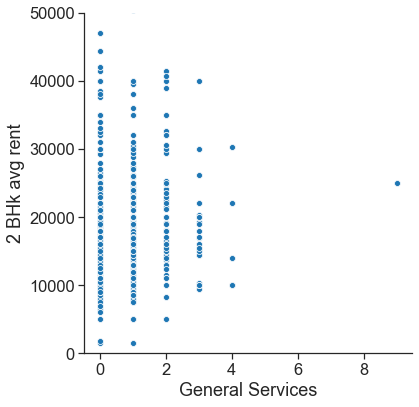

In [86]:
g = sns.pairplot(df2, x_vars=['General Services'], y_vars=['2 BHk avg rent'], height=6)
g.set(ylim=(0, 50000))

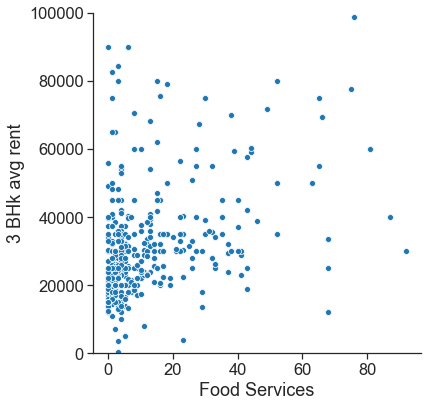

In [90]:
g = sns.pairplot(df3, x_vars=['Food Services'], y_vars=['3 BHk avg rent'], height=6)
g.set(ylim=(0, 100000))

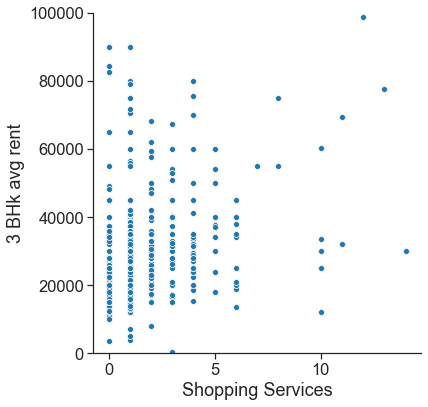

In [91]:
g = sns.pairplot(df3, x_vars=['Shopping Services'], y_vars=['3 BHk avg rent'], height=6)
g.set(ylim=(0, 100000))

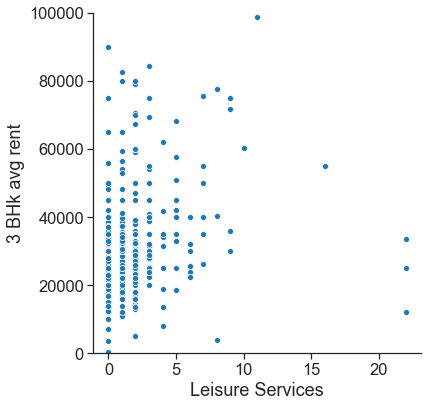

In [92]:
g = sns.pairplot(df3, x_vars=['Leisure Services'], y_vars=['3 BHk avg rent'], height=6)
g.set(ylim=(0, 100000))

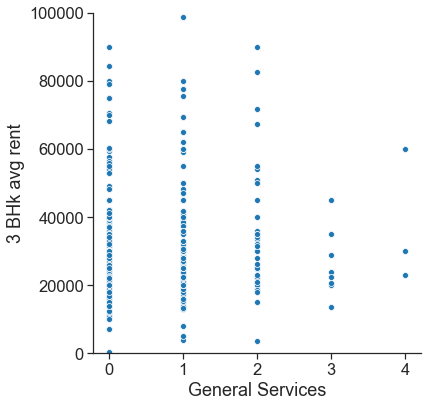

In [93]:
g = sns.pairplot(df3, x_vars=['General Services'], y_vars=['3 BHk avg rent'], height=6)
g.set(ylim=(0, 100000))

In [7]:
df1_min_food = df1[['Food Services', '1 BHk avg rent']].groupby('Food Services').apply(min)
df1_min_food = df1_min_food[['1 BHk avg rent']]
df1_min_food = df1_min_food.reset_index()

df1_min_shop = df1[['Shopping Services', '1 BHk avg rent']].groupby('Shopping Services').apply(min)
df1_min_shop = df1_min_shop[['1 BHk avg rent']]
df1_min_shop = df1_min_shop.reset_index()

df1_min_leis = df1[['Leisure Services', '1 BHk avg rent']].groupby('Leisure Services').apply(min)
df1_min_leis = df1_min_leis[['1 BHk avg rent']]
df1_min_leis = df1_min_leis.reset_index()

df1_min_gen = df1[['General Services', '1 BHk avg rent']].groupby('General Services').apply(min)
df1_min_gen = df1_min_gen[['1 BHk avg rent']]
df1_min_gen = df1_min_gen.reset_index()

df2_min_food = df2[['Food Services', '2 BHk avg rent']].groupby('Food Services').apply(min)
df2_min_food = df2_min_food[['2 BHk avg rent']]
df2_min_food = df2_min_food.reset_index()

df2_min_shop = df2[['Shopping Services', '2 BHk avg rent']].groupby('Shopping Services').apply(min)
df2_min_shop = df2_min_shop[['2 BHk avg rent']]
df2_min_shop = df2_min_shop.reset_index()

df2_min_leis = df2[['Leisure Services', '2 BHk avg rent']].groupby('Leisure Services').apply(min)
df2_min_leis = df2_min_leis[['2 BHk avg rent']]
df2_min_leis = df2_min_leis.reset_index()

df2_min_gen = df2[['General Services', '2 BHk avg rent']].groupby('General Services').apply(min)
df2_min_gen = df2_min_gen[['2 BHk avg rent']]
df2_min_gen = df2_min_gen.reset_index()

df3_min_food = df3[['Food Services', '3 BHk avg rent']].groupby('Food Services').apply(min)
df3_min_food = df3_min_food[['3 BHk avg rent']]
df3_min_food = df3_min_food.reset_index()

df3_min_shop = df3[['Shopping Services', '3 BHk avg rent']].groupby('Shopping Services').apply(min)
df3_min_shop = df3_min_shop[['3 BHk avg rent']]
df3_min_shop = df3_min_shop.reset_index()

df3_min_leis = df3[['Leisure Services', '3 BHk avg rent']].groupby('Leisure Services').apply(min)
df3_min_leis = df3_min_leis[['3 BHk avg rent']]
df3_min_leis = df3_min_leis.reset_index()

df3_min_gen = df3[['General Services', '3 BHk avg rent']].groupby('General Services').apply(min)
df3_min_gen = df3_min_gen[['3 BHk avg rent']]
df3_min_gen = df3_min_gen.reset_index()

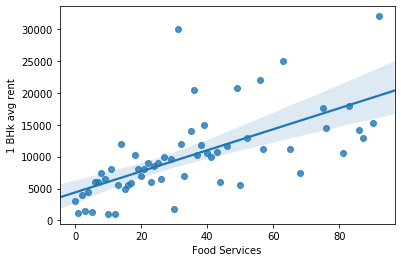

In [8]:
ax = sns.regplot(x='Food Services', y='1 BHk avg rent', data=df1_min_food)

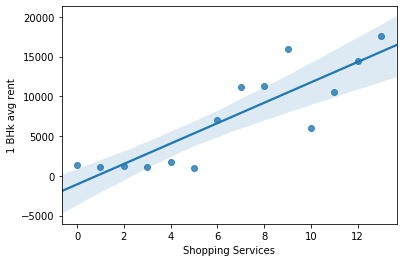

In [9]:
ax = sns.regplot(x='Shopping Services', y='1 BHk avg rent', data=df1_min_shop)

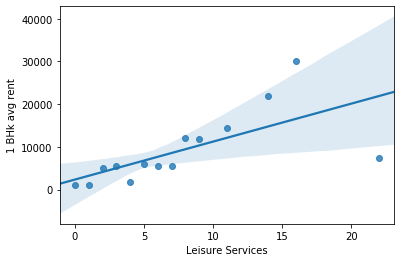

In [10]:
ax = sns.regplot(x='Leisure Services', y='1 BHk avg rent', data=df1_min_leis)

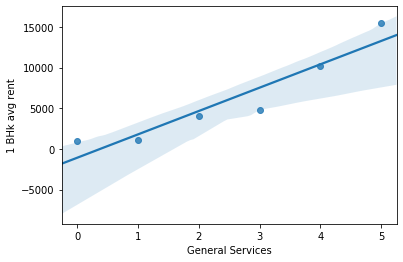

In [11]:
ax = sns.regplot(x='General Services', y='1 BHk avg rent', data=df1_min_gen)

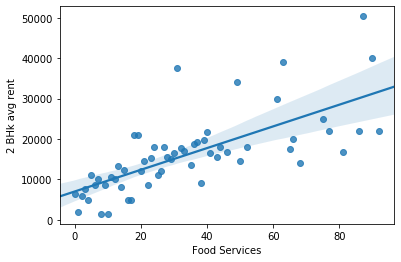

In [12]:
ax = sns.regplot(x='Food Services', y='2 BHk avg rent', data=df2_min_food)

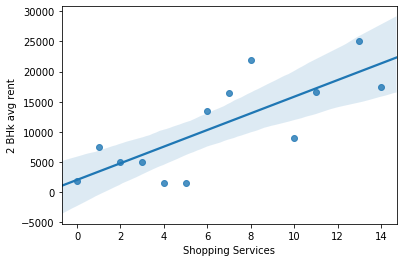

In [13]:
ax = sns.regplot(x='Shopping Services', y='2 BHk avg rent', data=df2_min_shop)

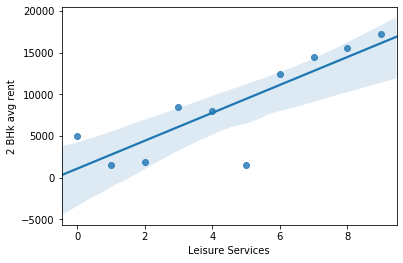

In [16]:
ax = sns.regplot(x='Leisure Services', y='2 BHk avg rent', data=df2_min_leis)

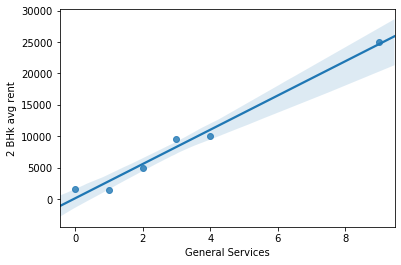

In [17]:
ax = sns.regplot(x='General Services', y='2 BHk avg rent', data=df2_min_gen)

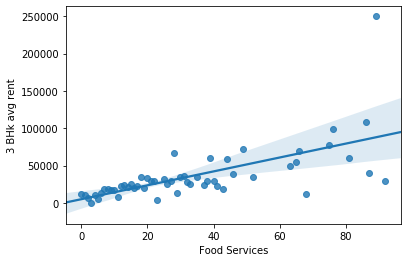

In [18]:
ax = sns.regplot(x='Food Services', y='3 BHk avg rent', data=df3_min_food)

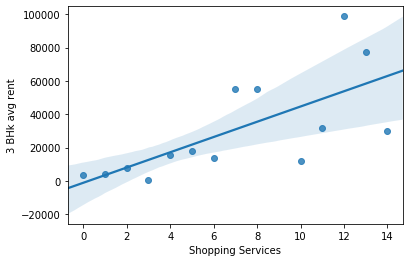

In [19]:
ax = sns.regplot(x='Shopping Services', y='3 BHk avg rent', data=df3_min_shop)

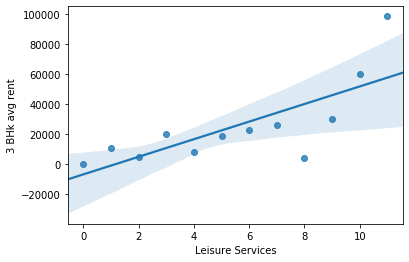

In [23]:
ax = sns.regplot(x='Leisure Services', y='3 BHk avg rent', data=df3_min_leis)

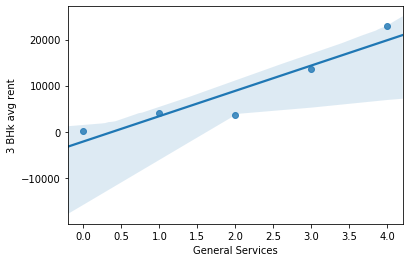

In [24]:
ax = sns.regplot(x='General Services', y='3 BHk avg rent', data=df3_min_gen)